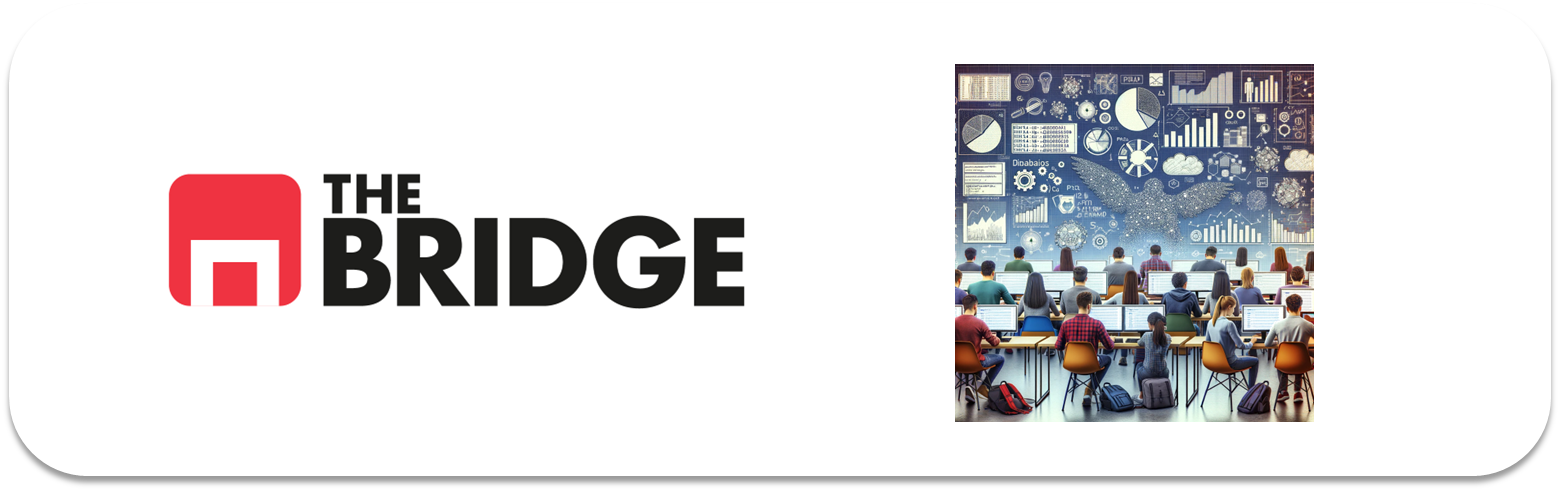

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



#### Importaciones y carga del dataset

In [60]:
## Importaciones previas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Carga del dataset en un dataframe

df_boston = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv")
df_boston.head() # vemos el dataframe

,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...


#### Tratamiento del dataset

In [61]:
df_boston_copy = df_boston.copy() # Creamos una copia del dataset para tratar la columna unificada

nombres_columnas = df_boston_copy.columns[0].split("|") # Dividimos los nombres de las columnas
df_boston_copy[nombres_columnas] = df_boston_copy[df_boston_copy.columns[0]].str.split("|", expand=True) # se divide la columna en varias columnas separadas por "|" 
df_boston_copy = df_boston_copy.drop(columns= df_boston_copy.columns[0]) # eliminamos la columna [0] inicial con los nombres encadenados
df_boston_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.12,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [62]:
## información del dataframe
df_boston_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  LSTAT    506 non-null    object
 12  MEDV     506 non-null    object
dtypes: object(13)
memory usage: 51.5+ KB


In [63]:
# como todos los valores del df son de tipo string, los pasamos a float.
df_boston_copy = df_boston_copy.astype(float)
df_boston_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### Variable target : MEDV (en miles de $) y su visualización gráfica

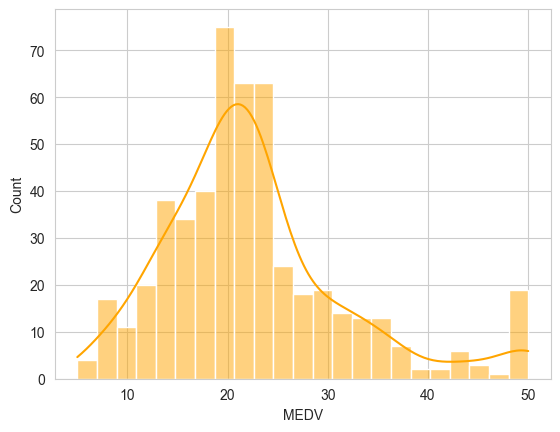

In [64]:
sns.histplot(df_boston_copy["MEDV"], color="orange", kde=True)
plt.show;

#### Correlaciones:

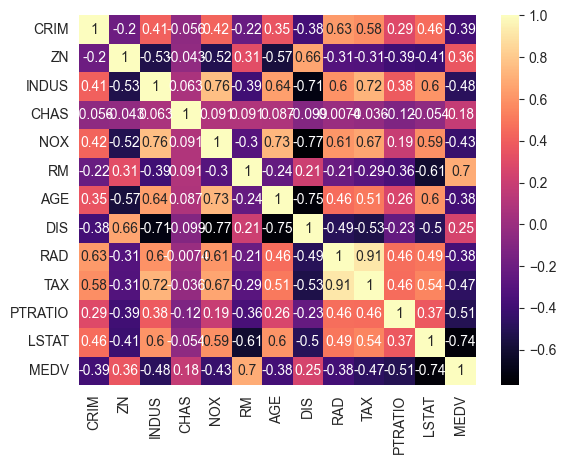

In [65]:
sns.heatmap(df_boston_copy.corr(numeric_only=True), annot=True, cmap="magma")
plt.show;

Como se trata de un modelo de regresión lineal, a priori nos quedaremos con las variables que mejor correlan con MEDV, tanto en sentido negativo, en este caso LSTAT (% de población de estatus socioeconómico bajo) como en positivo, en este caso RM (Número promedio de habitaciones por vivienda).


#### Split train / test:

In [66]:
## Almacenamos las features y el target en varibles
# Features:
X = df_boston_copy[['RM', 'LSTAT']]

# Target
y = df_boston_copy["MEDV"]

# Importamos el metodo:
from sklearn.model_selection import train_test_split

## Hacemos la division de train y test:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state =42)



#### Vemos la distribución de las features en el set de train:

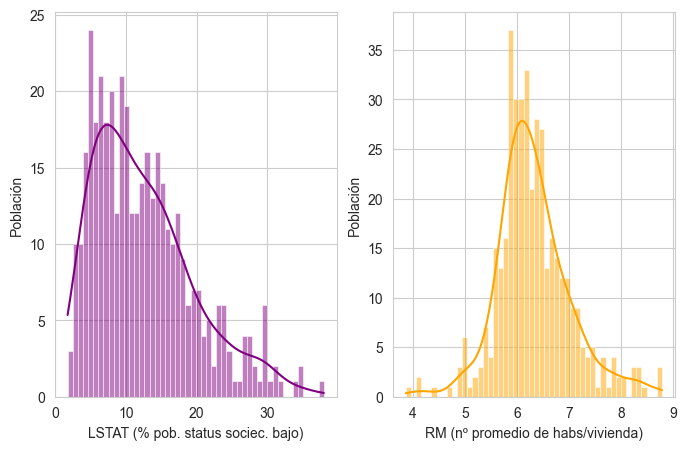

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))

sns.histplot( X_train["LSTAT"], ax= axs[0], bins=50, kde= True, color="purple")
sns.histplot( X_train["RM"], ax= axs[1], bins=50, kde= True, color= "orange")

axs[0].set_xlabel("LSTAT (% pob. status sociec. bajo)")
axs[0].set_ylabel("Población")
axs[1].set_xlabel("RM (nº promedio de habs/vivienda)")
axs[1].set_ylabel("Población")

plt.show;



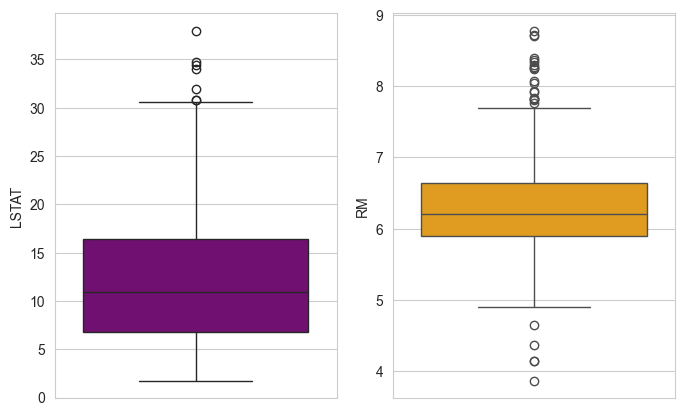

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))

sns.boxplot(X_train["LSTAT"], ax= axs[0], color= "purple")
sns.boxplot(X_train["RM"], ax= axs[1],color= "orange")

plt.show;

No podemos asumir que ambas siguen una distribución normal. Sí sabemos que se encuentran en escalas diferentes, una está en tanto por cien y RM en unidades. Vamos a aplicar un Min-Max scaler a nuestras features para normalizarlas antes de entrenar. 

#### Normalización de X_train

In [69]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train) # Ajustamos y transformamos el set de train de X. 
X_train_normalized


array([[0.29306488, 0.63962472],
       [0.40085418, 0.18598234],
       [0.44091926, 0.1683223 ],
       [0.45556233, 0.59492274],
       [0.37909294, 0.26352097],
       [0.52226968, 0.09243929],
       [0.44213952, 0.17328918],
       [0.51250763, 0.11147903],
       [0.46552776, 0.68211921],
       [0.60789099, 0.49806843],
       [0.49766118, 0.13852097],
       [0.46390075, 0.21302428],
       [0.67114094, 0.12775938],
       [0.47691682, 0.37086093],
       [0.79357332, 0.16087196],
       [0.35306081, 0.40783664],
       [0.37502542, 0.28366446],
       [0.53243848, 0.12775938],
       [0.35184055, 0.29718543],
       [0.53365874, 0.11506623],
       [0.42586943, 0.52124724],
       [0.4388855 , 0.23647903],
       [0.46898515, 0.11258278],
       [0.44295302, 0.1647351 ],
       [0.53955664, 0.12775938],
       [0.66951393, 0.0852649 ],
       [0.46552776, 0.36672185],
       [0.804759  , 0.05601545],
       [0.35590807, 0.7044702 ],
       [0.50233882, 0.15480132],
       [0.

#### Modelo de regresión lineal - Entrenamiento

In [70]:
from sklearn.linear_model import LinearRegression

rl = LinearRegression() 
rl.fit(X_train_normalized, y_train) # Entrenamos el set de train X normalizado e y. 

LinearRegression()

#### Interpretación de los pesos

In [71]:
print("Intercep:", rl.intercept_)
print("Pesos:", rl.coef_)

Intercep: 16.176276967903057
Pesos: [ 26.87189067 -22.92174791]


#### Evaluación

In [72]:
# Aplicamos las mismas transformaciones al x_test:
X_test_normalized = min_max_scaler.fit_transform(X_test) # Ajustamos y transformamos el set de test. 

prediccion = rl.predict(X_test_normalized) # Instaciamos las predicciones para verlas en una gráfica a continuación. 
prediccion

array([29.18720565, 34.94557493, 20.51603099, 29.44466214, 22.94016369,
       26.39464502, 19.92673827, 17.56982873, 25.48929337, 23.29436252,
       20.42461733, 21.29421636, -0.99021245, 25.86357787, 23.11892288,
       30.81433583, 20.2206171 ,  5.453664  , 42.03246565, 21.68922996,
       29.7767426 , 30.82726096, 15.84895542, 29.82706576, 22.24730034,
       17.12876489, 25.89076755, 24.56147275, 20.91561034, 22.04920131,
       20.31892598, 30.48411474, 31.61835708, 22.08219897, 18.45155845,
       20.40255277, 37.17471418, 25.39019525, 23.29481949, 29.16819807,
       14.88990849, 32.80349633, 43.04816764, 21.52659991, 29.3478174 ,
       19.53928961, 18.63368058, 30.75269872, 22.8179269 , 32.87150996,
       23.89874968, 35.4946425 , 21.03431087, 32.30087423, 39.4716806 ,
       27.52724196, 22.92866328, 35.69879373, 28.63512971, 17.9830121 ,
       30.95661887, 37.03488931, 33.55340996, 21.63862315, 32.55272233,
       13.30278552, 24.08631084, 30.0618274 , 33.43530823, 19.84

<function matplotlib.pyplot.show(close=None, block=None)>

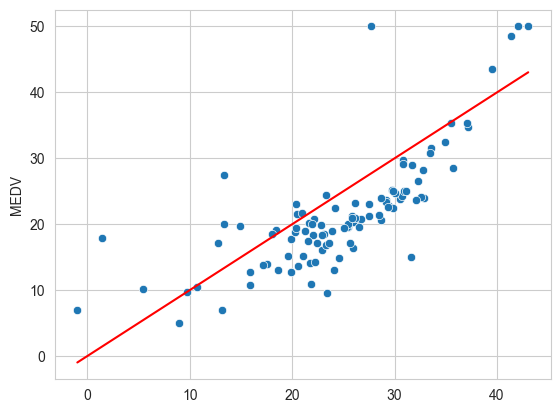

In [75]:
sns.scatterplot(x=prediccion, y= y_test);
plt.plot([min(prediccion), max(prediccion)],[min(prediccion), max(prediccion)], color= "red")
plt.show;

#### Vamos a ver los errores en train y en test

In [79]:
from sklearn import metrics

# Errores en Train:

predicciones_train = rl.predict(X_train_normalized) # hacemos las predicciones en train para comprar sus errores con el test
print("TRAIN ERROR:")
print('MAE train', metrics.mean_absolute_error(y_train, predicciones_train))
print('MSE train', metrics.mean_squared_error(y_train, predicciones_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, predicciones_train)))
print('R2 train', rl.score(X_train_normalized,y_train))
print("\n")

# Errores de test
print("TEST ERROR:")
print('MAE test', metrics.mean_absolute_error(y_test, prediccion))
print('MSE test', metrics.mean_squared_error(y_test, prediccion))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, prediccion)))
print('R2 test', rl.score(X_test_normalized,y_test))



TRAIN ERROR:
MAE train 3.9404902234222137
MSE train 30.391855193214617
RMSE train 5.512880843371695
R2 train 0.6501592679428922


TEST ERROR:
MAE test 5.466259247803792
MSE test 42.93989433550032
RMSE test 6.55285390768788
R2 test 0.4144595780416135


#### Regularización : Regresión Ridge
Como sólo henmos escogido dos features para el modelo (aquellas que mayor correlación tenían con el target), seleccionamos la regresión Ridge para que suavice los coeficientes, ya que son muy diferentes entre sí. Descarto por el momento la regresión Lasso, porque tenderá a quedarse sólo con una variable. Más tarde probaremos con la regresión Elastic Net. 

In [85]:
from sklearn.linear_model import Ridge, ElasticNet

ridgeR = Ridge(alpha = 10) 
ridgeR.fit(X_train_normalized, y_train) #Entrenamos

print("Resultados aplicando la regresión Ridge con alpha = 10:")
print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_normalized)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test_normalized)),2))
print("\n")
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_normalized))),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test_normalized))),2))



Resultados aplicando la regresión Ridge con alpha = 10:
Train MSE: 37.23
Test MSE: 36.89


Train RMSE: 6.1
Test RMSE: 6.07


In [86]:
ridgeR = Ridge(alpha = 15) 
ridgeR.fit(X_train_normalized, y_train) #Entrenamos

print("Resultados aplicando la regresión Ridge con alpha = 15:")
print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_normalized)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test_normalized)),2))
print("\n")
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_normalized))),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test_normalized))),2))

Resultados aplicando la regresión Ridge con alpha = 15:
Train MSE: 41.41
Test MSE: 38.73


Train RMSE: 6.44
Test RMSE: 6.22


In [87]:
ridgeR = Ridge(alpha = 8) 
ridgeR.fit(X_train_normalized, y_train) #Entrenamos

print("Resultados aplicando la regresión Ridge con alpha = 8:")
print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_normalized)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test_normalized)),2))
print("\n")
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_normalized))),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test_normalized))),2))

Resultados aplicando la regresión Ridge con alpha = 8:
Train MSE: 35.5
Test MSE: 36.47


Train RMSE: 5.96
Test RMSE: 6.04


#### Regresión Elastic Nest

In [90]:
elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5)
elastic_net.fit(X_train_normalized, y_train)

print("Resultados aplicando la regresión Elastic Nest con alpha = 0.5 y l1_ratio = 0.5:")
print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train_normalized)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test_normalized)))
print("\n")
print("Train RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train_normalized))))
print("Test RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test_normalized))))

Resultados aplicando la regresión Elastic Nest con alpha = 0.5 y l1_ratio = 0.5:
Train MSE: 73.4485
Test MSE: 62.9853


Train RMSE: 8.5702
Test RMSE: 7.9363


In [97]:
elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.1)
elastic_net.fit(X_train_normalized, y_train)

print("Resultados aplicando la regresión Elastic Nest con alpha = 0.5 y l1_ratio = 0.1:")
print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train_normalized)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test_normalized)))
print("\n")
print("Train RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train_normalized))))
print("Test RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test_normalized))))

Resultados aplicando la regresión Elastic Nest con alpha = 0.5 y l1_ratio = 0.1:
Train MSE: 76.9173
Test MSE: 66.1146


Train RMSE: 8.7702
Test RMSE: 8.1311


In [99]:
elastic_net = ElasticNet(alpha = 0.25, l1_ratio = 0.5)
elastic_net.fit(X_train_normalized, y_train)

print("Resultados aplicando la regresión Elastic Nest con alpha = 0.25 y l1_ratio = 0.5:")
print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train_normalized)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test_normalized)))
print("\n")
print("Train RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train_normalized))))
print("Test RMSE: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test_normalized))))

Resultados aplicando la regresión Elastic Nest con alpha = 0.5 y l1_ratio = 0.1:
Train MSE: 62.4011
Test MSE: 53.6476


Train RMSE: 7.8994
Test RMSE: 7.3245


##### Nos quedamos con la regresión Ridge con un valor alpha = 10
Presenta menos margen de MSE y RMSE.

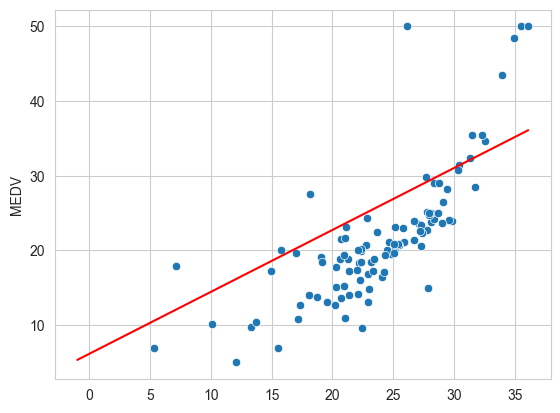

In [100]:
prediccion_regresion_ridge = ridgeR.predict(X_test_normalized)

sns.scatterplot(x=prediccion_regresion_ridge, y= y_test);
plt.plot([min(prediccion), max(prediccion_regresion_ridge)],[min(prediccion_regresion_ridge), max(prediccion_regresion_ridge)], color= "red")
plt.show;